# Data Analysis of NBA Player Statistics

This notebook performs data analysis on NBA player statistics, including points, assists, rebounds, steals, and blocks per game.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [2]:
# Load the dataset
data = pd.read_csv('../data/players_stats.csv')

# Display the first few rows of the dataset
data.head(11)

,Player Name,Team,Points Per Game,Assists Per Game,Rebounds Per Game,Steals Per Game,Blocks Per Game
0,Shai Gilgeous-Alexander,OKC,32.4,6.2,5.2,1.9,1.1
1,Giannis Antetokounmpo,MIL,31.0,5.8,12.0,0.8,1.3
2,Nikola Jokić,DEN,29.2,10.4,12.6,1.8,0.7
3,Anthony Edwards,MIN,27.5,4.6,6.0,1.2,0.6
4,Tyrese Maxey,PHI,27.1,6.0,3.4,1.8,0.4
5,Kevin Durant,PHO,26.9,4.3,6.0,0.9,1.4
6,Jayson Tatum,BOS,26.6,5.8,8.7,1.1,0.5
7,Luka Dončić,DAL,28.1,7.8,8.3,2.0,0.4
8,Stephen Curry,GSW,25.0,6.3,4.5,1.5,0.3
9,Joel Embiid,PHI,24.5,3.4,11.3,0.9,1.7


In [3]:
# Data preprocessing
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [4]:
# Exploratory Data Analysis
# Summary statistics
summary_stats = data.describe()
summary_stats

,Points Per Game,Assists Per Game,Rebounds Per Game,Steals Per Game,Blocks Per Game
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,23.163333,4.953333,6.413333,1.186667,0.636667
std,4.157791,2.007183,2.817646,0.395434,0.458997
min,15.600000,1.500000,3.400000,0.700000,0.200000
25%,20.100000,3.625000,4.275000,0.900000,0.300000
50%,22.600000,4.550000,5.150000,1.050000,0.400000
75%,26.200000,6.150000,8.175000,1.450000,0.675000
max,32.400000,10.400000,12.600000,2.000000,1.900000


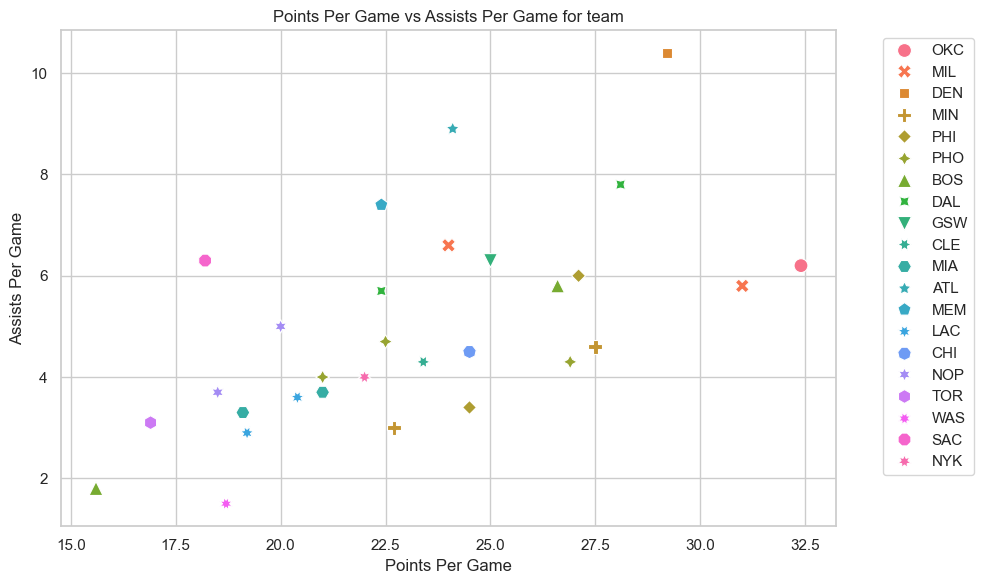

In [5]:
# Visualize Points Per Game vs Assists Per Game for team
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Points Per Game', y='Assists Per Game', data=data, hue='Team', style='Team', s=100)
plt.title('Points Per Game vs Assists Per Game for team')
plt.xlabel('Points Per Game')
plt.ylabel('Assists Per Game')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

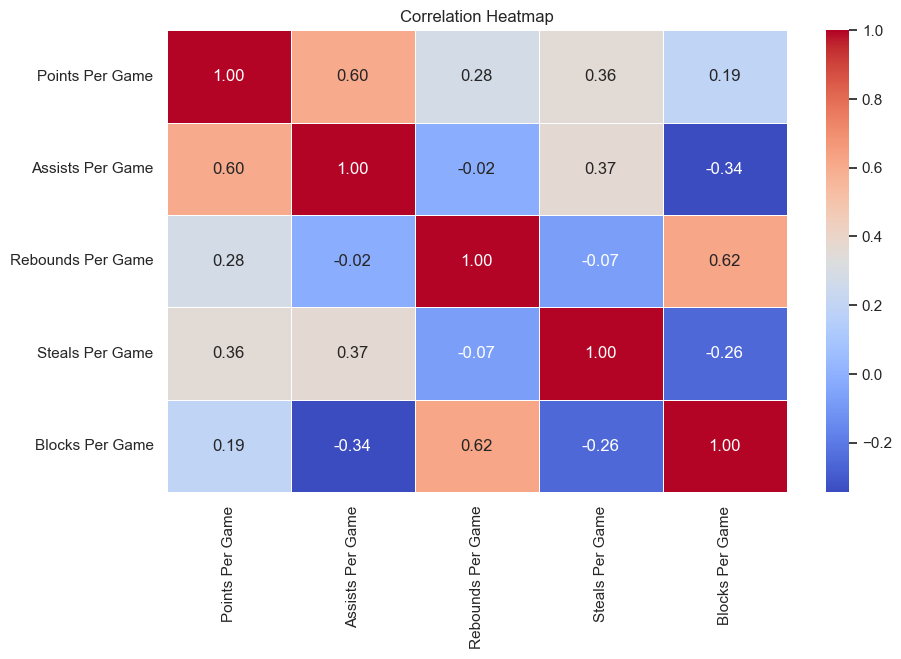

In [6]:
# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is loaded
if 'data' in locals() or 'data' in globals():
    # Select only numeric columns for correlation
    numeric_data = data.select_dtypes(include=['number'])
    
    # Compute the correlation matrix
    correlation = numeric_data.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("The 'data' variable is not defined. Please load the dataset first.")

C:\Users\beris\AppData\Local\Temp\ipykernel_11304\1870033608.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player Name', y='Points Per Game', data=sorted_data, palette='viridis')


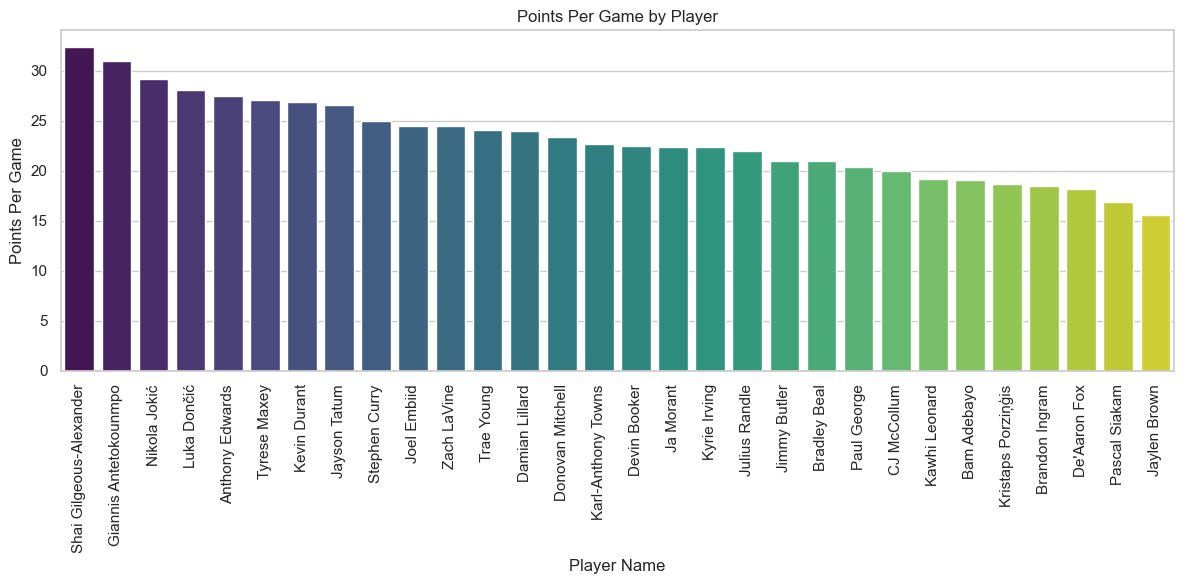

In [7]:
# Visualize Points Per Game by Player

sorted_data = data.sort_values(by='Points Per Game', ascending=False)
    
# Plot the sorted data
plt.figure(figsize=(12, 6))
sns.barplot(x='Player Name', y='Points Per Game', data=sorted_data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Points Per Game by Player')
plt.xlabel('Player Name')
plt.ylabel('Points Per Game')
plt.tight_layout()
plt.show()

In [8]:
# Group by team and sum the points
team_points = data.groupby('Team')['Points Per Game'].sum().sort_values(ascending=False)

# Display the top 7 teams
top_teams = team_points.head(7)
print(top_teams)

Team
PHO    70.4
MIL    55.0
PHI    51.6
DAL    50.5
MIN    50.2
BOS    42.2
MIA    40.1
Name: Points Per Game, dtype: float64


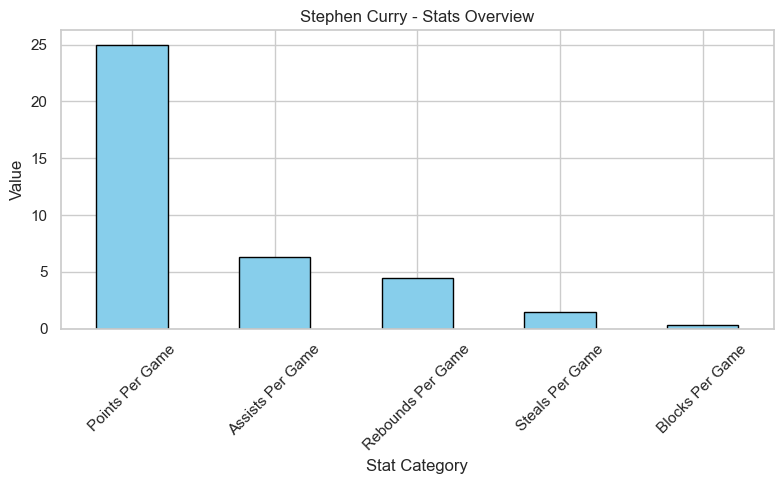

In [21]:
# Filter data for Stephen Curry
stephen_curry_stats = data[data['Player Name'] == 'Stephen Curry'].iloc[0]

# Extract stats for visualization
stats = stephen_curry_stats[['Points Per Game', 'Assists Per Game', 'Rebounds Per Game', 'Steals Per Game', 'Blocks Per Game']]

# Plot the stats
plt.figure(figsize=(8, 5))
stats.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Stephen Curry - Stats Overview')
plt.ylabel('Value')
plt.xlabel('Stat Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()